# Simple Linear Rgression

## Importing Needed Packages

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read data with pandas

In [4]:
df = pd.read_csv("./data/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration
#### Columns Name

In [5]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

#### Shape Of Dataset 

In [6]:
df.shape

(1067, 13)

#### Types Of Data

In [7]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

#### Number of Unique Data

In [8]:
df.nunique()

MODELYEAR                     1
MAKE                         39
MODEL                       663
VEHICLECLASS                 16
ENGINESIZE                   45
CYLINDERS                     7
TRANSMISSION                 22
FUELTYPE                      4
FUELCONSUMPTION_CITY        167
FUELCONSUMPTION_HWY         118
FUELCONSUMPTION_COMB        148
FUELCONSUMPTION_COMB_MPG     43
CO2EMISSIONS                159
dtype: int64

#### General Information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


#### General Description About The Dataset

In [10]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


#### Showing The Degree Of Correlation Between Numerical Data

In [11]:
df.corr(numeric_only=True)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [12]:
# The highest correlation between features and CO2EMISSIONS is between the following features:
# ENGINESIZE , CYLINDERS , FUELCONSUMPTION_CITY , FUELCONSUMPTION_HWY , FUELCONSUMPTION_COMB

#### Select This Features

In [13]:
cdf = df[['ENGINESIZE' , 'CYLINDERS' , 'FUELCONSUMPTION_CITY' , 'FUELCONSUMPTION_HWY' , 'FUELCONSUMPTION_COMB' , 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


#### Plot All Of The Features

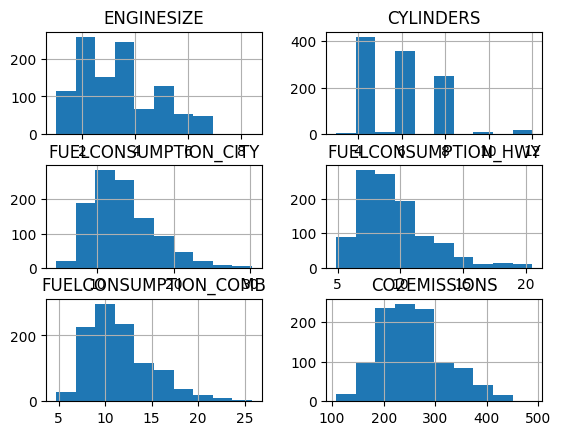

In [14]:
plot_count_features = cdf = df[['ENGINESIZE' , 'CYLINDERS' , 'FUELCONSUMPTION_CITY' , 'FUELCONSUMPTION_HWY' , 'FUELCONSUMPTION_COMB' , 'CO2EMISSIONS']]
plot_count_features.hist()
plt.show()

#### Now let's plot the correlation as a graph for the features we want

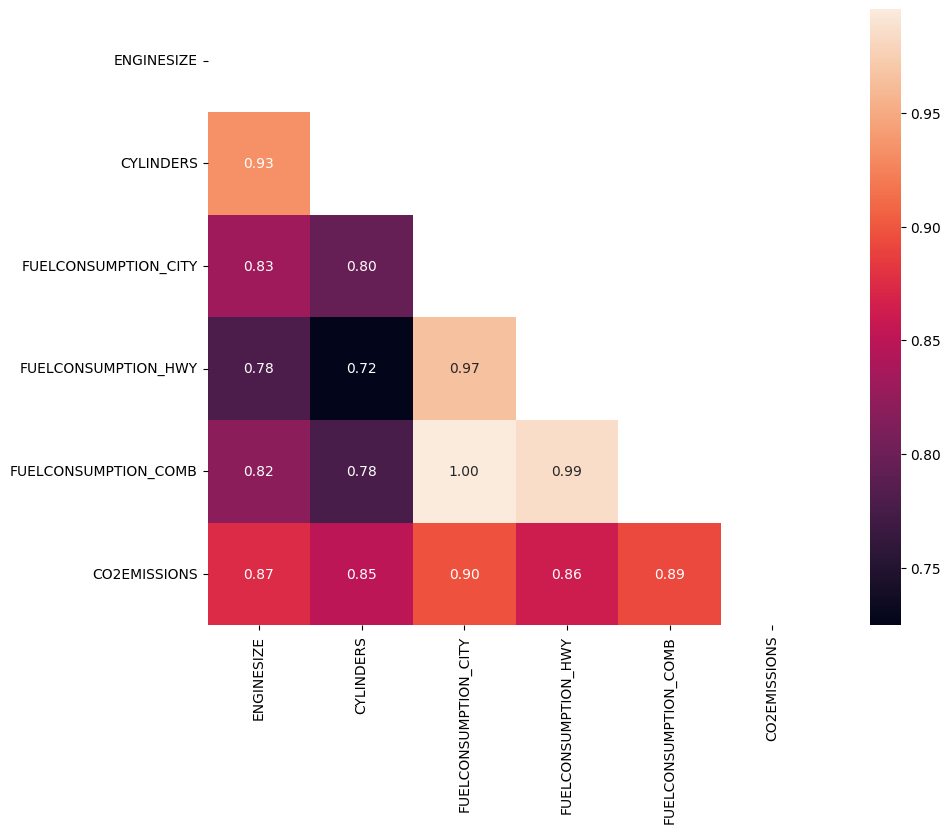

In [15]:
plt.figure(figsize=(12 , 8))
corr = cdf.corr()
mask = np.triu(corr)
sns.heatmap(corr , square=True , mask = mask , annot=True , fmt = '.2f')
plt.show()

## Simple Regression Model

## ENGINE SIZE

#### Now, for each of these features, plot a graph of the relationship with fuel consumption and then make a model

#### Thi first one for ENGINESIZE

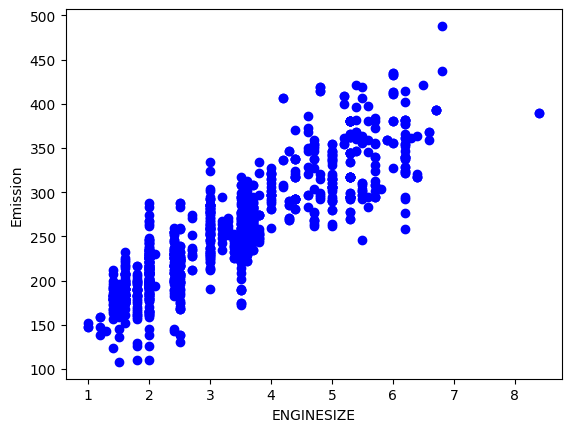

In [16]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.show()

#### Select the variables and then split the train and test data

In [17]:
X = cdf[['ENGINESIZE']]
y = cdf[['CO2EMISSIONS']]

# split %80 for tarin and %20 for test
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

print(X.shape)
print(X_train.shape)
print(X_test.shape)
print("------------------------")
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(1067, 1)
(853, 1)
(214, 1)
------------------------
(1067, 1)
(853, 1)
(214, 1)


### Modeling

#### Create regression model

In [18]:
model = LinearRegression()

#### Training the model

In [19]:
model.fit(X_train , y_train)

LinearRegression()

#### Using the model to predict the test data

In [29]:
y_pred = model.predict(X_test)

#### Calculating the Mean Square Error and R-Squared

In [21]:
# mse
mse = mean_squared_error(y_test , y_pred)

# r2-squared
r2 = r2_score(y_test , y_pred)

# show result
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")



Mean Squared Error: 985.9381692274999
R-Squared: 0.7615595731934373


#### Calculating intercept and coef

In [22]:
print(f"model intercept: {model.intercept_}")       # theta 0
print(f"model coef: {model.coef_}")                 # theta 1

model intercept: [126.28970217]
model coef: [[38.99297872]]


#### plot the fit line over the data

Text(0, 0.5, 'Emission')

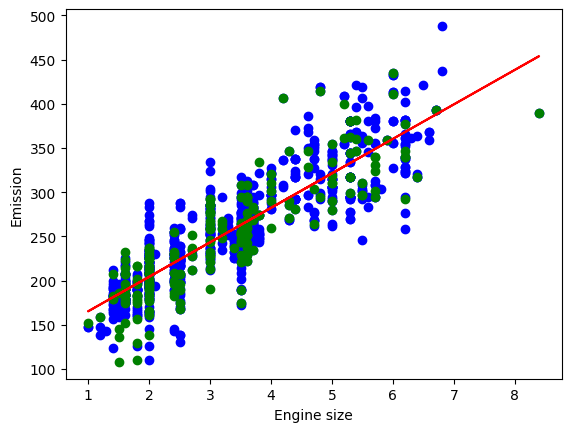

In [27]:
plt.scatter(X_train.ENGINESIZE, y_train.CO2EMISSIONS,  color='blue')
plt.scatter(X_test.ENGINESIZE, y_test.CO2EMISSIONS,  color='green')
plt.plot(X_train, model.coef_[0][0]*X_train + model.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## CYLINDERS

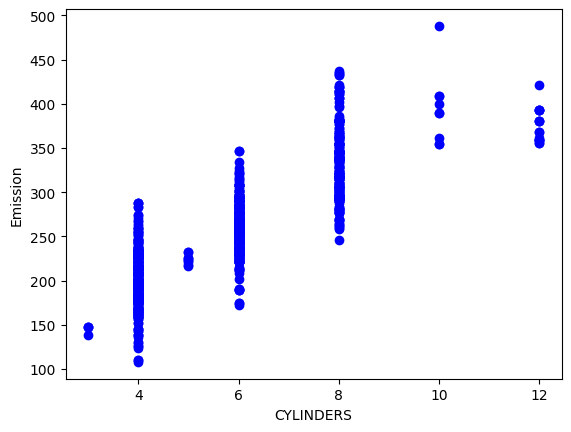

In [28]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

#### Select the variables and then split the train and test data

In [30]:
X = cdf[['CYLINDERS']]
y = cdf[['CO2EMISSIONS']]

# split %80 for tarin and %20 for test
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

print(X.shape)
print(X_train.shape)
print(X_test.shape)
print("------------------------")
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(1067, 1)
(853, 1)
(214, 1)
------------------------
(1067, 1)
(853, 1)
(214, 1)


### Modeling

#### Create regression model

In [31]:
model = LinearRegression()

#### Training the model

In [32]:
model.fit(X_train , y_train)

LinearRegression()

#### Using the model to predict the test data

In [33]:
y_pred = model.predict(X_test)

#### Calculating the Mean Square Error and R-Squared

In [34]:
# mse
mse = mean_squared_error(y_test , y_pred)

# r2-squared
r2 = r2_score(y_test , y_pred)

# show result
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 1109.3479754062441
R-Squared: 0.7317140029783895


#### Calculating intercept and coef

In [35]:
print(f"model intercept: {model.intercept_}")       # theta 0
print(f"model coef: {model.coef_}")                 # theta 1

model intercept: [86.08850036]
model coef: [[29.47839879]]


#### plot the fit line over the data

Text(0, 0.5, 'Emission')

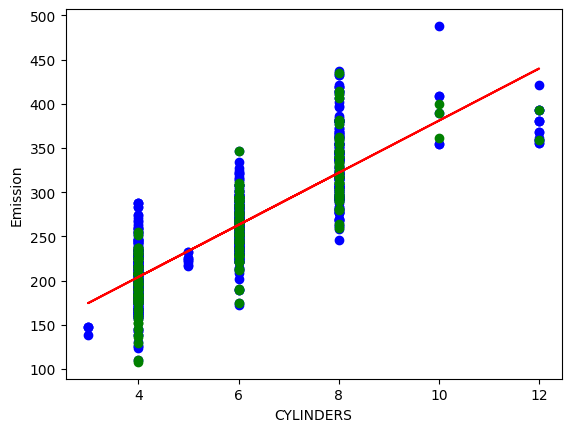

In [36]:
plt.scatter(X_train.CYLINDERS, y_train.CO2EMISSIONS,  color='blue')
plt.scatter(X_test.CYLINDERS, y_test.CO2EMISSIONS,  color='green')
plt.plot(X_train, model.coef_[0][0]*X_train + model.intercept_[0], '-r')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")

## FUELCONSUMPTION_CITY

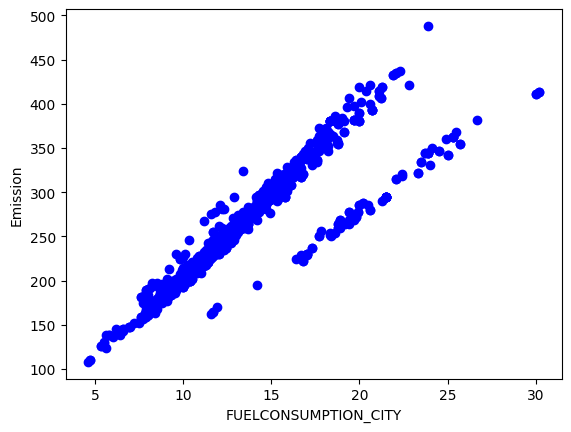

In [38]:
plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emission")
plt.show()

#### Select the variables and then split the train and test data

In [39]:
X = cdf[['FUELCONSUMPTION_CITY']]
y = cdf[['CO2EMISSIONS']]

# split %80 for tarin and %20 for test
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

print(X.shape)
print(X_train.shape)
print(X_test.shape)
print("------------------------")
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(1067, 1)
(853, 1)
(214, 1)
------------------------
(1067, 1)
(853, 1)
(214, 1)


### Modeling

#### Create regression model

In [40]:
model = LinearRegression()

#### Training the model

In [41]:
model.fit(X_train , y_train)

LinearRegression()

#### Using the model to predict the test data

In [42]:
y_pred = model.predict(X_test)

#### Calculating the Mean Square Error and R-Squared

In [43]:
# mse
mse = mean_squared_error(y_test , y_pred)

# r2-squared
r2 = r2_score(y_test , y_pred)

# show result
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 750.8103646320071
R-Squared: 0.8184231533160797


#### Calculating intercept and coef

In [45]:
print(f"model intercept: {model.intercept_}")       # theta 0
print(f"model coef: {model.coef_}")                 # theta1

model intercept: [72.30034697]
model coef: [[13.85179628]]


#### plot the fit line over the data

Text(0, 0.5, 'Emission')

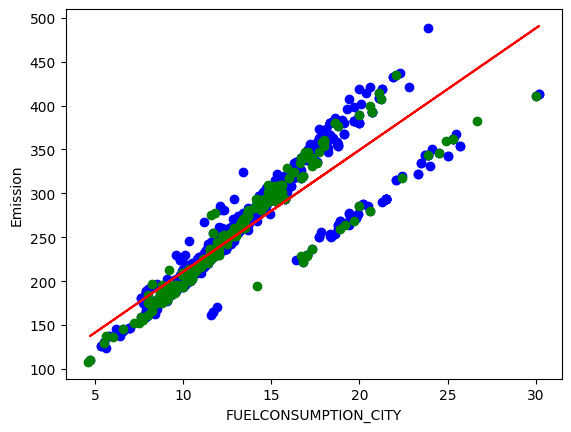

In [46]:
plt.scatter(X_train.FUELCONSUMPTION_CITY, y_train.CO2EMISSIONS,  color='blue')
plt.scatter(X_test.FUELCONSUMPTION_CITY, y_test.CO2EMISSIONS,  color='green')
plt.plot(X_train, model.coef_[0][0]*X_train + model.intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emission")

## FUELCONSUMPTION_HWY

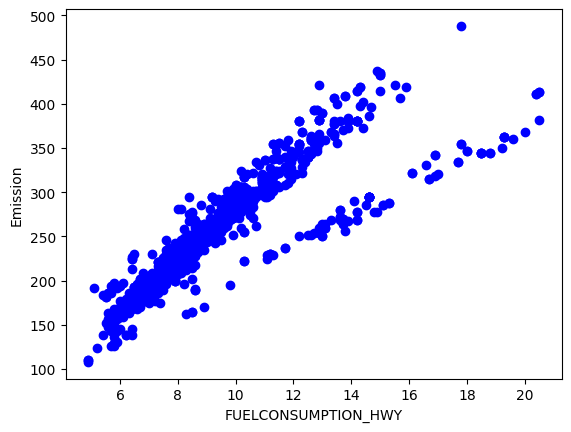

In [71]:
plt.scatter(cdf.FUELCONSUMPTION_HWY, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_HWY")
plt.ylabel("Emission")
plt.show()

#### Select the variables and then split the train and test data

In [72]:
X = cdf[['FUELCONSUMPTION_HWY']]
y = cdf[['CO2EMISSIONS']]

# split %80 for tarin and %20 for test
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

print(X.shape)
print(X_train.shape)
print(X_test.shape)
print("------------------------")
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(1067, 1)
(853, 1)
(214, 1)
------------------------
(1067, 1)
(853, 1)
(214, 1)


### Modeling

#### Create regression model

In [73]:
model = LinearRegression()

#### Training the model

In [74]:
model.fit(X_train , y_train)

LinearRegression()

#### Using the model to predict the test data

In [75]:
y_pred = model.predict(X_test)

#### Calculating the Mean Square Error and R-Squared

In [76]:
# mse
mse = mean_squared_error(y_test , y_pred)

# r2-squared
r2 = r2_score(y_test , y_pred)

# show result
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 1026.4557466042536
R-Squared: 0.7517607554334446


#### Calculating intercept and coef

In [77]:
print(f"model intercept: {model.intercept_}")       # theta 0
print(f"model coef: {model.coef_}")                 # theta1

model intercept: [72.14419015]
model coef: [[19.46343459]]


#### plot the fit line over the data

Text(0, 0.5, 'Emission')

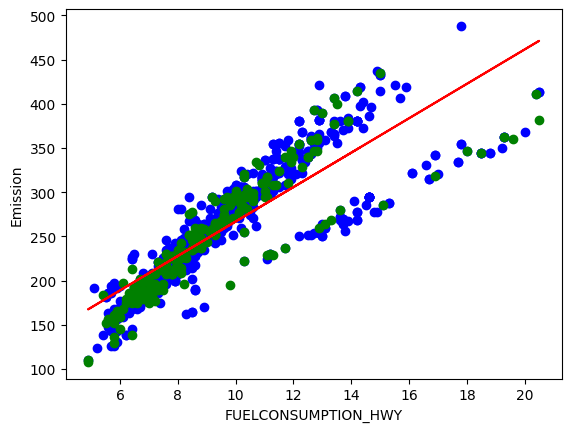

In [78]:
plt.scatter(X_train.FUELCONSUMPTION_HWY, y_train.CO2EMISSIONS,  color='blue')
plt.scatter(X_test.FUELCONSUMPTION_HWY, y_test.CO2EMISSIONS,  color='green')
plt.plot(X_train, model.coef_[0][0]*X_train + model.intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_HWY")
plt.ylabel("Emission")

## FUELCONSUMPTION_COMB

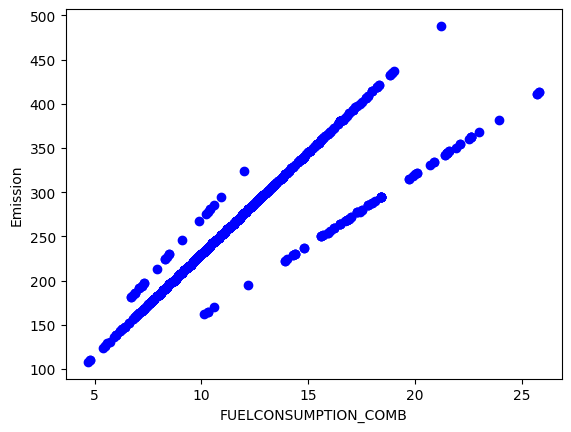

In [61]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

#### Select the variables and then split the train and test data

In [63]:
X = cdf[['FUELCONSUMPTION_COMB']]
y = cdf[['CO2EMISSIONS']]

# split %80 for tarin and %20 for test
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

print(X.shape)
print(X_train.shape)
print(X_test.shape)
print("------------------------")
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(1067, 1)
(853, 1)
(214, 1)
------------------------
(1067, 1)
(853, 1)
(214, 1)


### Modeling

#### Create regression model

In [64]:
model = LinearRegression()

#### Training the model

In [65]:
model.fit(X_train , y_train)

LinearRegression()

#### Using the model to predict the test data

In [66]:
y_pred = model.predict(X_test)

#### Calculating the Mean Square Error and R-Squared

In [67]:
# mse
mse = mean_squared_error(y_test , y_pred)

# r2-squared
r2 = r2_score(y_test , y_pred)

# show result
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 797.4346310097206
R-Squared: 0.8071474868274242


#### Calculating intercept and coef

In [68]:
print(f"model intercept: {model.intercept_}")       # theta 0
print(f"model coef: {model.coef_}")                 # theta1

model intercept: [69.10302618]
model coef: [[16.18090078]]


#### plot the fit line over the data

Text(0, 0.5, 'Emission')

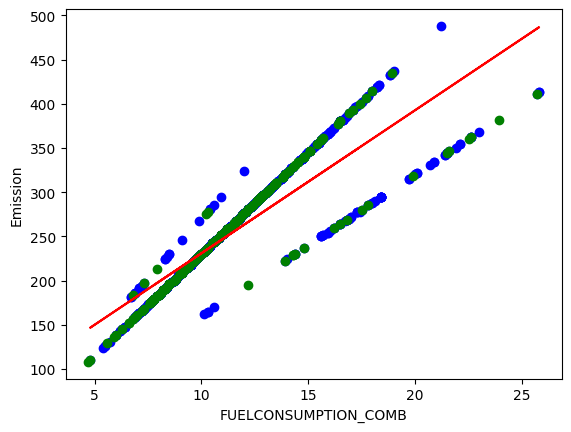

In [69]:
plt.scatter(X_train.FUELCONSUMPTION_COMB, y_train.CO2EMISSIONS,  color='blue')
plt.scatter(X_test.FUELCONSUMPTION_COMB, y_test.CO2EMISSIONS,  color='green')
plt.plot(X_train, model.coef_[0][0]*X_train + model.intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")